### Abstract

* label conditioning을 적용한 GAN


* 생성된 이미지의 품질을 평가 - discriminability & diversity of samples from from class-conditional image synthesis models
   * 인위적으로 resize된 32x32 샘플보다 128x128 샘플의 disciminability가 뛰어났음

### Introduction

* 자연 이미지(원본)는 내재적인 불변성을(invariances) 가지고 있고, 계량화하기 어려운 multi scale 통계 구조를 보여줌
* 최근의 발전으로 인해 보다 품질이 높은 이미지 생성 모델의 구축이 가능해졌음
   * 해상도, denoising, 압축 측면에서 우수함
* VAE나 auto regressive 모델들은 필요한 가정이 엄격한 측면이 있음 


* GAN은 globally coherent하고 고해상도의 이미지를 생성할 수 있도록 발전해 왔음


* 본 연구에서는 GAN의 잠재 공간에 구조와 손실 함수를 추가함으로서 보다 높은 퀄리티의 샘플을 생성할 수 있도록 함
   * 고해상도의 샘플은 저해상도 샘플에 대한 단순한 resizing X
   
   
* 또한 이미지 샘플의 다양성을 평가할 수 있는 평가지표를 소개
   * 해당 평가지표를 이용하여 생성된 샘플이 높은 다양성을 띈다는 것을 입증

### Background

* D는 입력이 진짜인지 G가 생성한 가짜인지 판별하는 로그 가능도를 최대화  /  G는 아래 식의 오른 쪽 항을 최소화

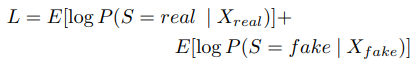


* 추가적인 정보를 활용하여 original GAN을 확장하려는 기존의 연구들
   * ex) G와 D에 class label 정보를 제공하여 conditioning을 가능케함 : cGAN
   
   
* D에 추가적인 정보를 제공하기 보다, D로 다른 정보를 reconstruct
   * auxiliary decoder network를 D에 더해 수정함 (훈련 데이터의 class label, 샘플이 생성되는 잠재변수의 subset의 출력)
   
   
**class conditional + auxiliary decoder**

### AC-GANs

* 모든 생성된 이미지는 noise z + 그에 맞는 class label c을 가짐




* D는 입력에 대한 확률 분포 P(S|X)와, class label에 대한 확률 분포 P(C|X) = D(X)
   * 목적 함수 : 정답 source(진짜인지 생성자가 생성한 이미지인지)에 대한 로그 가능도 Ls  /  정답 class에 대한 로그 가능도 Lc
   
   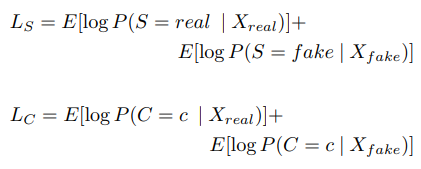
   
   
* D는 Ls + Lc를 최대화 (class도 잘 맞추고, 분류도 잘함)  /  G는 Lc - Ls를 최대화 (class를 잘 맞추고, D가 제대로 분류를 못하게)
   * 기본적인 GAN구조와 유사하지만 안정적인 학습을 가능하게 함

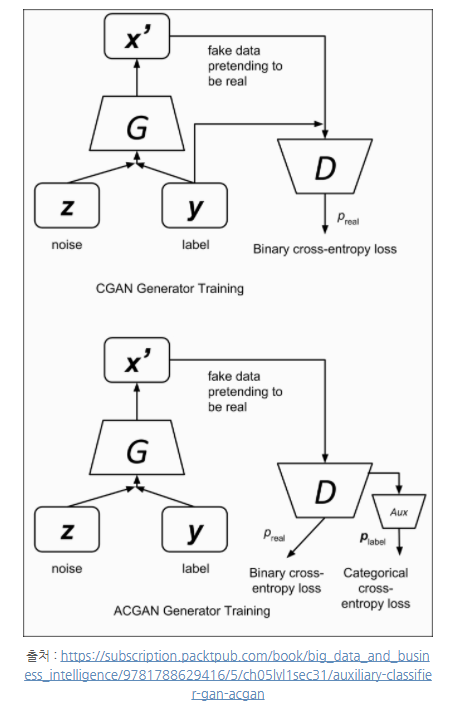

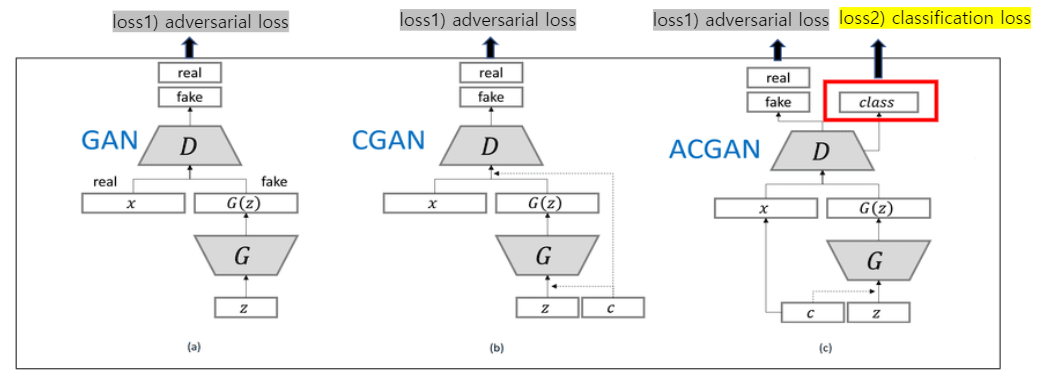

### Results

#### Generating High Resolution Images Improves Discriminability


* 높은 해상도가 분별 능력을 향상 시키는 것을 보여주는 것이 목표 (노이즈가 많은 고해상도의 이미지 X)


* 합성 이미지는 단순히 낮은 해상도에서 높은 해상도로 resize하는 것이 아닌, 의도한 class에 속하는 것처럼 보여야 함
  * 저해상도 이미지보다 판별 가능한 고해상도 이미지 생성이 목적
  
  
* Discriminability는 합성 이미지를 사전 학습된 Inception Net에 입력으로 넣어 얼마나 정확하게 라벨링하는 비율을 계산

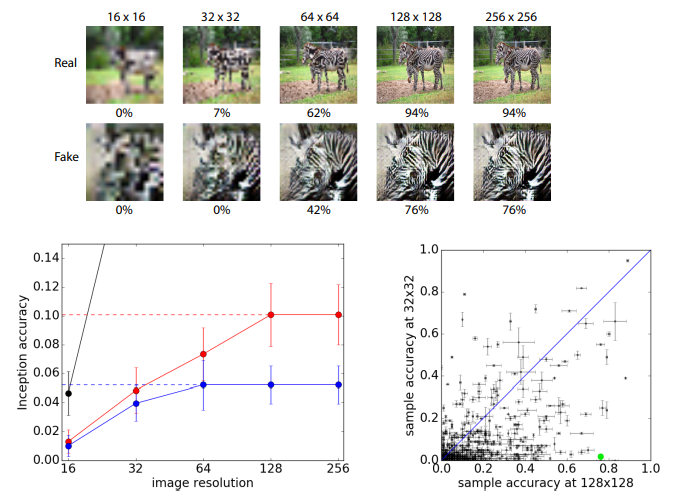

* 고해상도의 이미지 생성이 판별 능력을 향상시킴

#### Measuring the Diversity of Generated Images



* class conditional 모델의 이미지는 클래스당 하나의 이미지를 출력하는 지(mode collapse) 여부에 관심이 없음
   * Inception score는 mode collapse를 측정할 수 없음 (모델이 하나의 예를 외워도 잘 작동함)
   
   
* 생성된 샘플의 클래스의 다양성을 평가하기 위한 보완적 metric : MS-SIM
   * 이미지의 유사성을 정량적으로 판단 (다양할 수록 점수가 낮음)

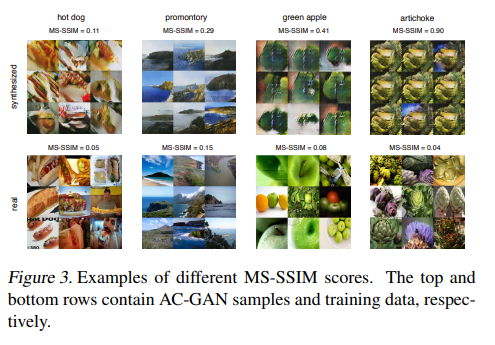

#### Generated Images are both Diverse and Discriminable


* 다양성과 판별 가능함의 상호작용 (positively)

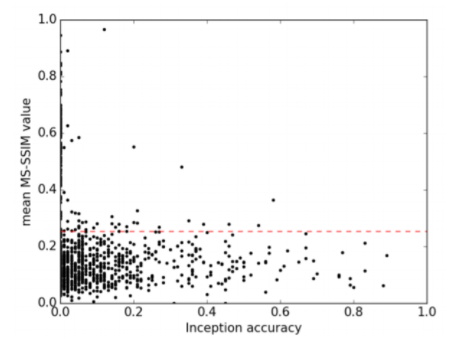


* 다양성이 낮은 클래스의 74%는 inception 정확도가 1% 이하 (0에 가깝게 점들이 분포)
* 다양성이 높은 클래스의 78%는 inception 정확도가 1% 이상


* GAN에서는 높은 퀄리티의 샘플은 다양성에 반비례한다는 가설과 대조적 : 추가적 조사 필요

#### Searching for Signatures of Overfitting


* 훈련 데이터를 memorize하지 않는 것을 확인하기 위해 L1 distance로 이미지 샘플의 Nearest neighbor확인
* 샘플과 훈련 데이터의 nn이 유사하지 않은 것을 확인 (AC-GAN이 데이터를 암기하는 것이 아니라는 증거)


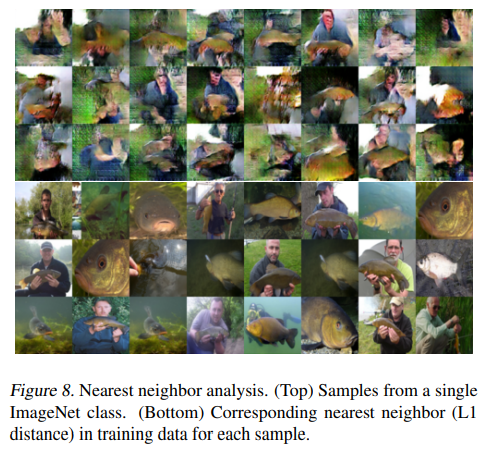

* 모델의 잠재 공간을 보간으로 탐색하여 판단


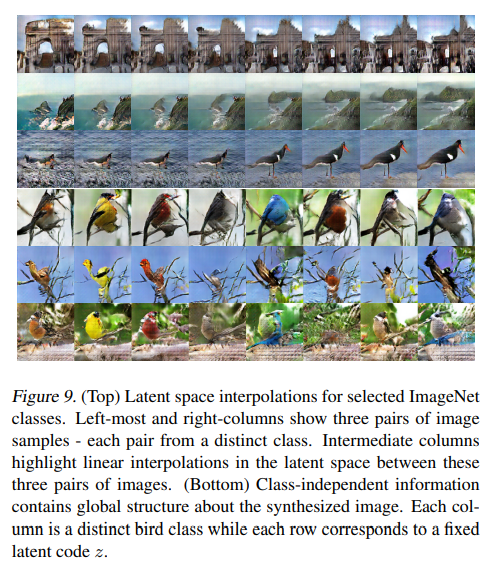